# Part-Time Employment in the NSW State Government

In the Data Analysis case study under the Virtual Internship Program of the NSW Government (c/o [InsideSherpa](https://www.insidesherpa.com/)), I prepared an analysis on part-time employees to brief the Director before a meeting with the Workforce Diversity Steering Committee. The meeting aimed to review whether part-time employment arrangements are increasing.

My aim in this internship was to provide:

* Trends over time in male and female employment, including any notable changes
* The current representation of part-time employees in the sector and each cluster
* The current representation of male and female part-time employees as a proportion of the respective male and the female workforce in the sector and each cluster
* Change in these two above statistics over the last 4 years
* Projection of what the representation will be by 2025 if the current trends continue

InsideSherpa provided the dataset as an Excel File (`Data Analysis - Data Sheets.xlsx`). 

## Dataset Exploration

To begin, I imported selected Python modules and read the Excel file as a DataFrame. The dataset has 6 columns. As shown, the `Cluster` column has 10 unique values, `Year` has 5, `PT/FT` has 2, and `Gender` has 2. There are no missing data (null values) in these columns and the dataset is clean. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from matplotlib import cm
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
%matplotlib inline
sns.set_style('white')

df = pd.read_excel(io='Data Analysis - Data Sheets.xlsx', sheet_name='PT & FT Data PivotTable format')
print(df.head(5), '\n')
print(df.columns, '\n')
print(df['Cluster'].unique(), '\n')
print(df['Year'].unique(), '\n')
print(df['PT/FT'].unique(), '\n')
print(df['Gender'].unique(), '\n')

                       Cluster                                Agency  Year  \
0                    Education                    Education Agency 1  2014   
1                    Education                    Education Agency 2  2014   
2                    Education                    Education Agency 3  2014   
3                    Education                    Education Agency 4  2014   
4  Family & Community Services  Family & Community Services Agency 1  2014   

       PT/FT  Gender  Headcount  
0  Full-Time  Female        180  
1  Full-Time  Female       2463  
2  Full-Time  Female         32  
3  Full-Time  Female      39251  
4  Full-Time  Female       9817   

Index(['Cluster', 'Agency', 'Year', 'PT/FT', 'Gender', 'Headcount'], dtype='object') 

['Education' 'Family & Community Services'
 'Finance, Services & Innovation' 'Health' 'Industry' 'Justice'
 'Planning & Environment' 'Premier & Cabinet' 'Transport' 'Treasury'] 

[2014 2015 2016 2017 2018] 

['Full-Time' 'Part-Time'] 

['

## Male, Female Employment Over Time 

In performing the data analysis, I created spreadsheet-style pivot tables as DataFrames and then used it as input to visualize the results. 

*Trends over time in male and female employment, including any notable changes*

* Male employment over time shows a downward trend from 2014 - 2018, with the lowest employment at 132,654 employees in 2016. This corresponds to a 3.6% decrease relative to male employment in 2014. Meanwhile, female employment over time shows an upward trend from 2014 - 2018, with the highest employment at 246,129 employees in 2017. This indicates a 0.6% increase relative to female employment in 2014. The NSW government also employed more females than males from 2014 - 2018, with the largest disparity occurring in 2017 (~2 females per male employee).

*Notes on data visualization*

I used colored line plots (blue for `Male`, red for `Female`) and a secondary axis to visualize the trends while saving space. Combining the line plots in a single *y* axis will make it difficult to see the trends due to the higher magnitude of `Female` over `Male` data. 

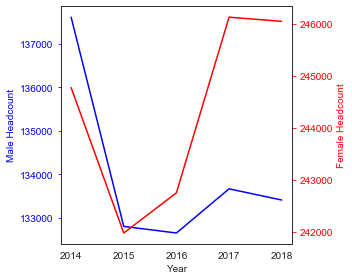

In [2]:
df1 = df.pivot_table(values='Headcount', index='Year', columns='Gender', aggfunc=np.sum)
df1 = df1.reset_index()

fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Male', data=df1, color='b', ax=ax1)
sns.lineplot(x='Year', y='Female', data=df1, color='r', ax=ax2)
ax1.set_ylabel('Male Headcount', color='b')
ax1.tick_params(axis='y', labelcolor='b', colors='b')
ax1.set_xticks(range(2014,2019,1))
ax2.set_ylabel('Female Headcount', color='r')
ax2.tick_params(axis='y', labelcolor='r', colors='r')

plt.tight_layout()
plt.savefig('Fig1.jpg')
plt.show()


## Current Representation of Part-Time Employees

*The current representation of part-time employees in the sector and each cluster*

* In 2018, part-time employees comprised 29.6% of the sector workforce.

In [3]:
df_pt2018 = df[(df['PT/FT']=='Part-Time') & (df['Year']==2018)] 
df_ft2018 = df[(df['PT/FT']=='Full-Time') & (df['Year']==2018)] 

full_time_2018 = df_ft2018['Headcount'].sum()
part_time_2018 = df_pt2018['Headcount'].sum()
part_time_2018pct = 100*part_time_2018 / (full_time_2018 + part_time_2018)

d = {'Employee': ['Part-Time', 'Full-Time'], 
     'Headcount (2018)': [part_time_2018, full_time_2018],
     'Percentage': [round(part_time_2018pct, 1), 100-round(part_time_2018pct, 1)]}

df_emp2018 = pd.DataFrame(data=d)
df_emp2018.style.hide_index()

Employee,Headcount (2018),Percentage
Part-Time,112250,29.6
Full-Time,267210,70.4


* The clusters of `Education` (44.2%), `Health` (33.1%), and `Finance, Services & Innovation` (24.2%) have the highest representation of part-time employees in 2018.  Meanwhile, the clusters of `Industry` (6.7%), `Treasury` (9.7%), and `Justice` (10.6%) have the lowest representation of part-time employees in 2018.

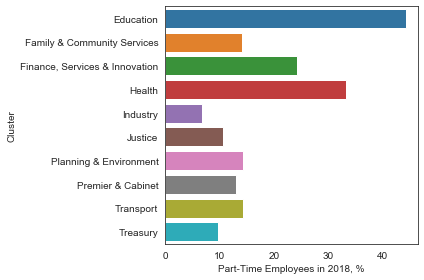

In [4]:
df2 = df[df['Year']==2018].pivot_table(values='Headcount', index='Cluster', columns='PT/FT', aggfunc=np.sum)
df2['Full-Time_Pct'] = 100*df2['Full-Time']/(df2['Full-Time'] + df2['Part-Time'])
df2['Part-Time_Pct'] = 100 - df2['Full-Time_Pct']
df2 = df2.reset_index()

fig, ax1 = plt.subplots(figsize=(6,4))
sns.barplot(x='Part-Time_Pct', y='Cluster', data=df2, ax=ax1)
ax1.set_xlabel('Part-Time Employees in 2018, %')

plt.tight_layout()
plt.savefig('Fig2.jpg')
plt.show()


## Current Representation of Male, Female Part-Time Employees

*The current representation of male and female part-time employees as a proportion of the respective male and the female workforce in the sector and each cluster*

* About 16.5% of males and 36.7% of females in the sector are part-time employees in 2018. 

In [5]:
pt_2018m = df_pt2018[df_pt2018['Gender']=='Male']['Headcount'].sum()
pt_2018f= df_pt2018[df_pt2018['Gender']=='Female']['Headcount'].sum()
ft_2018m = df_ft2018[df_ft2018['Gender']=='Male']['Headcount'].sum()
ft_2018f= df_ft2018[df_ft2018['Gender']=='Female']['Headcount'].sum()

d = {
    'Gender': ['Male', 'Female'],
    'Headcount (2018)': [pt_2018m+ft_2018m, pt_2018f+ft_2018f],
    'Part-Time, %': [round(100*pt_2018m/(pt_2018m+ft_2018m),1), round(100*pt_2018f/(pt_2018f+ft_2018f),1)],
    'Full-Time, %': [100-round(100*pt_2018m/(pt_2018m+ft_2018m),1), 100-round(100*pt_2018f/(pt_2018f+ft_2018f),1)]
}

df_gen2018 = pd.DataFrame(data=d)
df_gen2018.style.hide_index()


Gender,Headcount (2018),"Part-Time, %","Full-Time, %"
Male,133411,16.5,83.5
Female,246049,36.7,63.3


* The clusters of `Education` (35.3%), `Finance`, `Services & Innovation` (20%), and `Health` (19.9%) have the highest representation of male part-time employees in 2018. Meanwhile, `Industry` (2%), `Treasury` (3%), and `Family & Community Services` (4.7%) have the lowest representation of male part-time employees in 2018. For the representation of female part-time employees in 2018, `Education` (46.8%), `Health` (37.7%), and `Finance, Services & Innovation` (27%) show the highest values while `Industry` (10.9%), `Treasury` (14.2%), and `Family & Community Services` (16.9%) indicate the lowest.

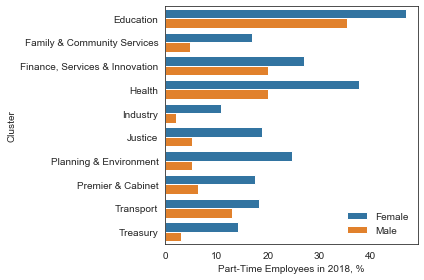

In [6]:
df3 = df[df['Year']==2018].pivot_table(values='Headcount', index=['Cluster', 'Gender'], columns='PT/FT', aggfunc=np.sum)
df3 = df3.reset_index()
df3.loc[:, 'Headcount (2018)'] = df3['Full-Time'] + df3['Part-Time']
df3.loc[:, 'Part-Time, %'] = round(100*df3['Part-Time']/df3['Headcount (2018)'],1)
df3.loc[:, 'Full-Time, %'] = 100 - df3['Part-Time, %']

fig, ax1 = plt.subplots(figsize=(6,4))
sns.barplot(x='Part-Time, %', y='Cluster', hue='Gender', data=df3, ax=ax1)
ax1.set_xlabel('Part-Time Employees in 2018, %')
ax1.legend(frameon=False)

plt.tight_layout()
plt.savefig('Fig3.jpg')
plt.show()


## Representation of Male, Female Part-Time Employees: Trends, Forecast

*Change in these two above statistics over the last 4 years*<br/>
*Projection of what the representation will be by 2025 if the current trends continue*

* The proportion of males as part-time employees in the sector increased from 2014 - 2018. Following the upward trend, male part-time employees could reach 26.8% by 2025. On the other hand, the proportion of females as part-time employees in the sector peaked in 2017 and could decrease to 29% by 2025.

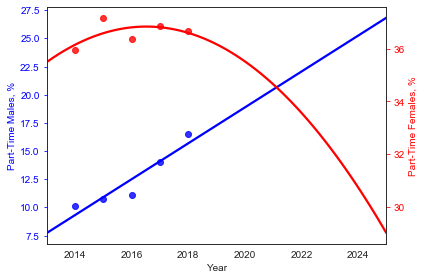

In [7]:

df4 = df.pivot_table(values='Headcount', index=['Year'], columns=['PT/FT', 'Gender'], aggfunc=np.sum)
df4.loc[:, ('Part-Time_Pct', 'Female')] = 100*df4['Part-Time']['Female'] / (df4['Part-Time']['Female'] + df4['Full-Time']['Female'])
df4.loc[:, ('Part-Time_Pct', 'Male')] = 100*df4['Part-Time']['Male'] / (df4['Part-Time']['Male'] + df4['Full-Time']['Male'])
df4 = df4.reset_index()

fig, ax1 = plt.subplots(figsize=(6,4))
ax1.set_xlim(xmin=2013, xmax=2025)
ax2 = ax1.twinx()
sns.regplot(x=df4['Year'], y=df4['Part-Time_Pct']['Male'], color='b', ax=ax1, ci=None, order=1)
sns.regplot(x=df4['Year'], y=df4['Part-Time_Pct']['Female'], color='r', ax=ax2, ci=None, order=2)
ax1.set_ylabel('Part-Time Males, %', color='b')
ax1.tick_params(axis='y', labelcolor='b', colors='b')
ax2.set_ylabel('Part-Time Females, %', color='r')
ax2.tick_params(axis='y', labelcolor='r', colors='r')

plt.tight_layout()
plt.savefig('Fig4.jpg')
plt.show()


In [8]:
def project(x, y, n):
    
    x = x[:,np.newaxis]
    y = y[:,np.newaxis]
    
    polynomial_features = PolynomialFeatures(degree = n)
    x_transf = polynomial_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_transf, y)
    
    x_new = np.arange(2014, 2026, 1)
    x_new = x_new[:,np.newaxis]
    x_new_transf = polynomial_features.fit_transform(x_new)
    
    y_pred = model.predict(x_new_transf)
    
    return y_pred

pt_male2025 = np.asscalar(project(df4['Year'], df4['Part-Time_Pct']['Male'], 1)[-1])
pt_female2025 = np.asscalar(project(df4['Year'], df4['Part-Time_Pct']['Female'], 2)[-1])

print('Part-time male employees in 2025 = {:.1f}%'.format(pt_male2025))
print('Part-time female employees in 2025 = {:.1f}%'.format(pt_female2025))

Part-time male employees in 2025 = 26.8%
Part-time female employees in 2025 = 29.0%


* The clusters `Education`, `Finance`, `Services & Innovation`, `Health`, `Justice`, and `Transport` show upward trends in the proportion of males as part-time employees from 2014-2018. By 2025, male part-time employees in the mentioned clusters could reach the following proportions: `Education` - 61.1%, `Finance, Services & Innovation` - 47.8%, `Health` - 27.2%, `Justice` - 9.8%, and `Transport` - 25.3%. The other clusters (`Family & Community Services`, `Industry`, `Planning & Environment`, `Premier & Cabinet`, and `Treasury`) indicate downward trends in the proportion of males as part-time employees from 2014-2018. In these clusters, male part-time employees could no longer be available by 2025.

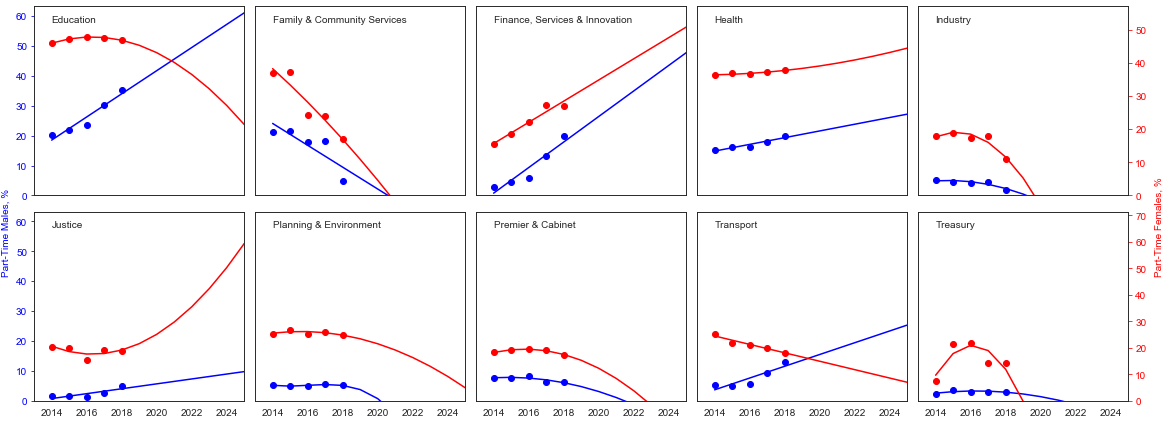

In [9]:
df5 = df.pivot_table(values='Headcount', index=['Cluster','Year'], columns=['PT/FT', 'Gender'], aggfunc=np.sum)
df5.loc[:, ('Part-Time_Pct', 'Female')] = 100*df5['Part-Time']['Female'] / (df5['Part-Time']['Female'] + df5['Full-Time']['Female'])
df5.loc[:, ('Part-Time_Pct', 'Male')] = 100*df5['Part-Time']['Male'] / (df5['Part-Time']['Male'] + df5['Full-Time']['Male'])
df5 = df5.reset_index()

df6 = df5.copy()[['Cluster', 'Year']]
df6.loc[:,'Male'] = df5.copy()['Part-Time_Pct']['Male']
df6.loc[:,'Female'] = df5.copy()['Part-Time_Pct']['Female']

d = {'Cluster': df6['Cluster'].unique(), 'Male': [1, 1, 1, 1, 2, 1, 3, 2, 1, 2], 'Female': [2, 2, 1, 2, 2, 2, 2, 2, 1, 2]}
reg_deg = pd.DataFrame(data=d).set_index('Cluster')

male_pred = []
female_pred = []

for clus in df6['Cluster'].unique():
    df_input = df6[df6['Cluster']==clus].copy()[['Year', 'Male', 'Female']]
    
    ypred_m = project(df_input['Year'], df_input['Male'], reg_deg['Male'][clus])
    ypred_f = project(df_input['Year'], df_input['Female'], reg_deg['Female'][clus])
    male_pred.append(ypred_m.flatten())
    female_pred.append(ypred_f.flatten())
        
df_mpred = pd.DataFrame(male_pred, index=df6['Cluster'].unique(), columns=np.arange(2014, 2026, 1))
df_fpred = pd.DataFrame(female_pred, index=df6['Cluster'].unique(), columns=np.arange(2014, 2026, 1))
df_mpred = df_mpred.transpose()
df_fpred = df_fpred.transpose()


fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(16,6))
fig.subplots_adjust(wspace=0.1, hspace=0.1)
ax = ax.flatten()
ax2 = []

for count, axis in enumerate(ax):
    axis.set_xlim(xmin=2013, xmax=2025)
    axis.xaxis.set_major_locator(plt.MaxNLocator(6))
    axis2 = axis.twinx()
    ax2.append(axis2)
    
ax2[4].get_shared_y_axes().join(ax2[0], ax2[1], ax2[2], ax2[3], ax2[4])
ax2[9].get_shared_y_axes().join(ax2[5], ax2[6], ax2[7], ax2[8], ax2[9])

cluster = df6['Cluster'].unique()

for count, axis in enumerate(ax):
    df_input2 = df6[df6['Cluster']==cluster[count]]
    axis.scatter(x=df_input2['Year'], y=df_input2['Male'], c='b')
    ax2[count].scatter(x=df_input2['Year'], y=df_input2['Female'], c='r')
    axis.annotate(s=cluster[count], xy=(2014,58), xycoords='data')
    
    sns.lineplot(x=df_mpred.index, y=df_mpred.columns[count], data=df_mpred, ax=axis, color='b')
    sns.lineplot(x=df_fpred.index, y=df_fpred.columns[count], data=df_fpred, ax=ax2[count], color='r')
    axis.set_ylabel('')
    axis.tick_params(axis='y', which='both', left=False, labelleft=False)
    axis.set_ylim(bottom=0)
    ax2[count].set_ylabel('')
    ax2[count].tick_params(axis='y', which='both', right=False, labelright=False)

ax[0].tick_params(axis='y', labelcolor='b', colors='b', which='both', left=True, labelleft=True)
ax[5].tick_params(axis='y', labelcolor='b', colors='b', which='both', left=True, labelleft=True)
ax2[4].tick_params(axis='y', labelcolor='r', colors='r', right=True, labelright=True)
ax2[9].tick_params(axis='y', labelcolor='r', colors='r', right=True, labelright=True)
ax2[4].set_ylim(bottom=0)
ax2[9].set_ylim(bottom=0)

plt.tight_layout()
plt.annotate('Part-Time Males, %', xy=(2,150), xycoords='figure pixels', rotation='vertical', c='b')
plt.annotate('Part-Time Females, %', xy=(1155,150), xycoords='figure pixels', rotation='vertical', c='r')
plt.show()


* In terms of female part-time employees from 2014 - 2018, clusters `Finance`, `Services & Innovation`, `Health`, and `Justice` indicate upward trends. By 2025, the mentioned clusters could have the following proportions for part-time female employees: `Finance, Services & Innovation` - 50.8%, `Health` - 44.4%, and `Justice` - 59.4%. The other clusters (`Education`, `Family & Community Services`, `Industry`, `Planning & Environment`, `Premier & Cabinet`, `Transport`, and `Treasury`) show downward patterns in the proportion of females as part-time employees. These remaining clusters except for `Education` (21.4%), `Planning & Environment` (4.9%), and `Transport` (7%) indicate zero proportion of female part-time employees in 2025.

## Conclusion

We expect employment in the NSW State Government of part-time males to increase and part-time females to decrease in the next 5 years. For the employment of part-time males, 5 out of the 10 clusters (`Education`, `Finance, Services & Innovation`, `Health`, `Justice`, and `Transport`) are predicted to hire more until 2025. For the employment of part-time females, all clusters except `Finance, Services & Innovation`, `Health`, and `Justice` are forecasted to hire less until 2025.